In [76]:
import warnings
warnings.filterwarnings("ignore")

In [77]:
from sklearn.datasets import load_digits
digit = load_digits()
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [78]:
X = digit.data
y = digit.target

In [79]:
import pandas as pd
df = pd.DataFrame(data= X, columns= digit.feature_names)
df["target"] = y
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [82]:
knn.score(X_test,y_test)

0.9844444444444445

Text(20.72222222222222, 0.5, 'Truth')

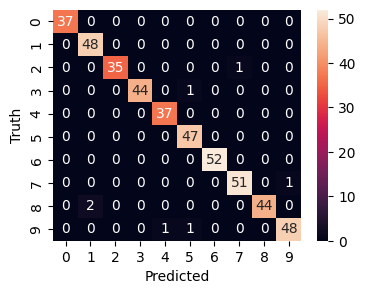

In [83]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

%matplotlib inline
plt.figure(figsize= (4,3))
sns.heatmap(cm, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.96      1.00      0.98        48
           2       1.00      0.97      0.99        36
           3       1.00      0.98      0.99        45
           4       0.97      1.00      0.99        37
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        52
           7       0.98      0.98      0.98        52
           8       1.00      0.96      0.98        46
           9       0.98      0.96      0.97        50

    accuracy                           0.98       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [85]:
#Hyperparamet Tuning
from sklearn.model_selection import GridSearchCV

#Parameter Dictionary
gcv = GridSearchCV(estimator= KNeighborsClassifier(),
                   param_grid= {"n_neighbors":[3,5,7,10],
                                "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
                                "p": [1,2,3,4,5]})
gcv.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 10], 'p': [1, 2, 3, 4, 5]})

In [86]:
dff = pd.DataFrame(gcv.cv_results_)
dff[["params","mean_test_score","mean_fit_time"]].loc[dff["mean_test_score"] == gcv.best_score_]

,params,mean_test_score,mean_fit_time
1,"{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}",0.983671,0.000641
3,"{'algorithm': 'auto', 'n_neighbors': 3, 'p': 4}",0.983671,0.000655
23,"{'algorithm': 'ball_tree', 'n_neighbors': 3, '...",0.983671,0.010915
43,"{'algorithm': 'kd_tree', 'n_neighbors': 3, 'p'...",0.983671,0.004587
61,"{'algorithm': 'brute', 'n_neighbors': 3, 'p': 2}",0.983671,0.000648
63,"{'algorithm': 'brute', 'n_neighbors': 3, 'p': 4}",0.983671,0.000715


Text(20.72222222222222, 0.5, 'Truth')

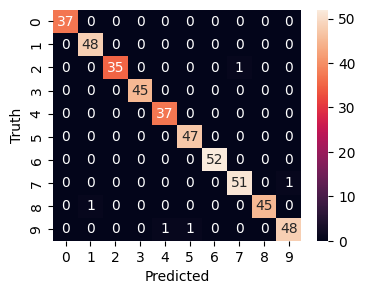

In [87]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm= "auto",p=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

%matplotlib inline
plt.figure(figsize= (4,3))
sns.heatmap(cm, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [88]:
knn.score(X_test,y_test)

0.9888888888888889